In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cardio_detection = pd.read_csv('Data/cardio_train.csv', sep =';')
mortality = pd.read_csv('Data/new_mortality.csv')

In [3]:
cardio_detection.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cardio_detection['age_in_year'] = cardio_detection['age'].apply(lambda x : math.floor(x/365))

In [5]:
cardio_detection.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [6]:
cardio_death = cardio_detection[cardio_detection['cardio']== 1]

No handles with labels found to put in legend.


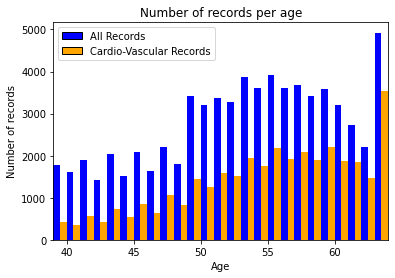

In [7]:
from matplotlib.patches import Rectangle

mx = cardio_detection.age_in_year.max()
mn = cardio_detection.age_in_year.min()
colors = ['blue', 'orange']
plt.hist([cardio_detection.age_in_year,cardio_death.age_in_year], bins = mx-mn, color = colors, rwidth = 1.6)
#plt.hist(cardio_death.age_in_year, color = 'r')
plt.xlim(39, mx)
plt.title('Number of records per age')
plt.xlabel('Age')
plt.ylabel('Number of records')
plt.legend()
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['blue', 'orange']]
labels= ['All Records', 'Cardio-Vascular Records']
plt.legend(handles, labels)
#plt.yscale('log')

In [8]:
cardio_detection.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50


In [9]:
cardio_detection.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [10]:
labels = ['Gender', 'Cholesterol', 'Glucose', 'Smoking', 'Alcohol', 'Physical Activity']

cs = [cardio_detection.gender.value_counts()[0]]
cd = [cardio_detection.gender.value_counts()[1]]

KeyError: 0

In [106]:
labels = ['Male', 'Female']
ds = cardio_detection['gender'].value_counts()
size = ds.values

In [107]:
size

array([45530, 24470])

Text(0.5, 1.0, 'Repartition of all records by sex')

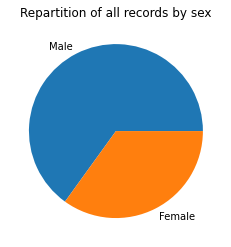

In [108]:
plt.pie(size, labels = labels)
plt.title('Repartition of all records by sex')

In [109]:
labels = ['Male', 'Female']
ds = cardio_death['gender'].value_counts()
size = ds.values

In [110]:
size

array([22616, 12363])

Text(0.5, 1.0, 'Repartition of cardio-vascular disease by sex')

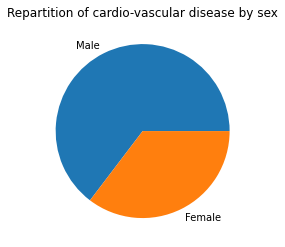

In [111]:
plt.pie(size, labels = labels)
plt.title('Repartition of cardio-vascular disease by sex')

In [114]:

cardio_detection.shape

(70000, 14)

In [115]:
cardio_death.shape

(34979, 14)

In [118]:
mortality.Year.value_counts().size

32

In [119]:
2019-1988


31

In [11]:
mort = pd.read_csv('Data/new_mortality.csv')
mort_filt = pd.read_csv('Data/new_cardio_mortality.csv')

In [12]:
mort.All_deaths.sum()

792103115

In [13]:
mort.Year.min()

1988

In [121]:
100*mort_filt.All_deaths.sum()/mort.All_deaths.sum()

13.069844953204104

In [97]:
year_count = mort.groupby('Year').agg({'All_deaths':'sum'})['All_deaths']
year_count_filt = mort_filt.groupby('Year').agg({'All_deaths':'sum'})['All_deaths']

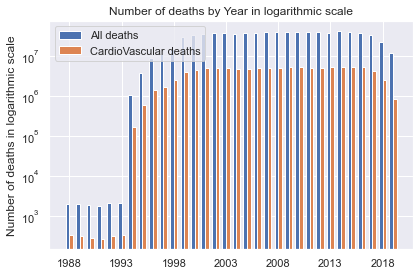

In [107]:
labels = year_count.index


width = 0.35

x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, year_count.values, width, label = 'All deaths')
rects2 = ax.bar(x+width/2, year_count_filt.values, width, label = 'CardioVascular deaths')

ax.set_ylabel('Number of deaths in logarithmic scale')
ax.set_title('Number of deaths by Year in logarithmic scale')
x = x[0:-1:5]
ax.set_xticks(x)
labels = labels[0:-1:5]
ax.set_xticklabels(labels)
ax.legend()
ax.set_yscale('log')



fig.tight_layout()

plt.show()


In [52]:
count_cont = pd.read_csv('Data/countryContinent.csv')

In [53]:
count_cont = count_cont[['country', 'continent']]

In [54]:
mort_filt = pd.merge(mort_filt, count_cont, how = 'left', left_on = 'Country_name', right_on = 'country')
mort = pd.merge(mort, count_cont, how = 'left', left_on = 'Country_name', right_on = 'country')

In [81]:
mort.head(1)

,Year,Cause,Sex,All_deaths,D_at_0,D_at_1,D_at_2,D_at_3,D_at_4,D_at_5-9,...,D_at_90-94,D_at_95+,D_at_unknown,D_at_day_0,D_at_day_1-6,D_at_day_7-27,D_at_day_28-364,Country_name,country,continent
0,2000,A00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Egypt,Egypt,Africa


In [90]:
country_count = mort.groupby(by = 'continent').agg({'All_deaths' : 'sum'})['All_deaths']

In [91]:
country_count_filt = mort_filt.groupby(by = 'continent').agg({'All_deaths' : 'sum'})['All_deaths']

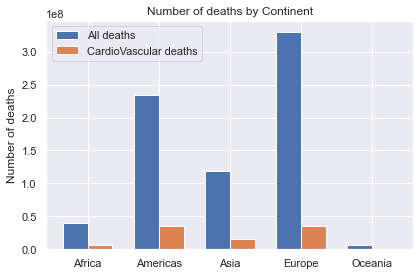

In [93]:
import seaborn as sns


#country_count_filt =  mort_filt['continent'].value_counts()
#country_count = mort['continent'].value_counts()

labels = country_count.index


width = 0.35

x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, country_count.values, width, label = 'All deaths')
rects2 = ax.bar(x+width/2, country_count_filt.values, width, label = 'CardioVascular deaths')

ax.set_ylabel('Number of deaths')
ax.set_title('Number of deaths by Continent')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#ax.set_yscale('log')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
